In [1]:
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
import torch as t




下面我们来尝试实现对CIFAR-10数据集的分类，步骤如下:
    使用torchvision加载并预处理CIFAR-10数据集
    定义网络
    定义损失函数和优化器
    训练网络并更新网络参数
    测试网络

In [2]:
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
import torch as t
#对定义数据进行预处理
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
show= ToPILImage()

#torchvision加载并预处理CIFAR-10数据集
trainset= tv.datasets.CIFAR10(root='/home/yg/learning/',train= True,download=True,transform=transform)

trainloader=t.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

testset=tv.datasets.CIFAR10(root='/home/yg/learning/', train=False,download=True,transform=transform)
testloader=t.utils.data.DataLoader(testset, batch_size=2, shuffle=False)




#定义网络


#定义损失函数和优化器
#训练网络并更新网络参数
#测试网络

Files already downloaded and verified
Files already downloaded and verified


car


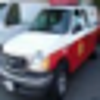

In [3]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
#访问数据
(data,label)=trainset[60]
print(classes[label])

show((data + 1)/2).resize((100,100))

      horse         car         cat       plane


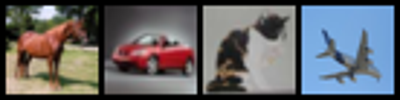

In [4]:
dataiter=iter(trainloader)
images,labels = next(dataiter)
print(' '.join('%11s'%classes[labels[j]]for j in range(4)))
show(tv.utils.make_grid((images+1)/2)).resize((400,100))


#定义网络


In [5]:
import torch.nn as nn
import torch.nn.functional

class Net(nn.Module):
    def __init__(self) -> None:
        super(Net,self).__init__()
        #卷积层
        self.conv1=nn.Conv2d(3,6,5)
        self.conv2=nn.Conv2d(6,16,5)
        #nn.pol
        # 全连接
        self.fc1=nn.Linear(16*5*5,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)

        


    def forward(self,x):
        x=torch.nn.functional.max_pool2d(torch.nn.functional.relu(self.conv1(x)),(2,2))
        x=torch.nn.functional.max_pool2d(torch.nn.functional.relu(self.conv2(x)),2)
        x=x.view(x.size()[0],-1)
        x=torch.nn.functional.relu(self.fc1(x))
        x=torch.nn.functional.relu(self.fc2(x))
        x=self.fc3(x)
        return x
net=Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


定义损失函数和优化器

In [6]:
from torch import optim
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(),lr=0.001,momentum=0.9)


所有网络的训练流程都是类似的，不断地执行如下流程：

输入数据
前向传播+反向传播
更新参数

In [7]:
from torch.autograd import Variable

t.set_num_threads(8)
for epoch in range(2):  
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        
        # 输入数据
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)
        
        # 梯度清零
        optimizer.zero_grad()
        
        # forward + backward 
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()   
        
        # 更新参数 
        optimizer.step()
        
        # 打印log信息
        running_loss += loss.item()
        if i % 2000 == 1999: # 每2000个batch打印一下训练状态
            print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 2.222
[1,  4000] loss: 1.886
[1,  6000] loss: 1.695
[1,  8000] loss: 1.580
[1, 10000] loss: 1.539
[1, 12000] loss: 1.502
[2,  2000] loss: 1.432
[2,  4000] loss: 1.391
[2,  6000] loss: 1.389
[2,  8000] loss: 1.352
[2, 10000] loss: 1.330
[2, 12000] loss: 1.316
Finished Training


In [8]:
correct = 0 # 预测正确的图片数
total = 0 # 总共的图片数
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = t.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('10000张测试集中的准确率为: %d %%' % (100 * correct / total))

10000张测试集中的准确率为: 53 %
